In [3]:
import torch
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_results(model_name):
    with open(f"../results/{model_name}/run00_0/08_Evaluation of the model/results.pkl", "rb") as f:
        results = pickle.load(f)
    return results

model_name = "cbow"
results = load_results(model_name)
print(np.mean(np.asarray(results["training_train"]["logits"] > 0.5,dtype=int) == results["training_train"]["labels"]))
print(np.mean(np.asarray(results["training_validation"]["logits"] > 0.5,dtype=int) == results["training_validation"]["labels"]))
print(np.mean(np.asarray(results["calibration_train"]["logits"] > 0.5,dtype=int) == results["calibration_train"]["labels"]))
print(np.mean(np.asarray(results["calibration_validation"]["logits"] > 0.5,dtype=int) == results["calibration_validation"]["labels"]))

0.7677376355316138
0.755407448124227
0.7589661142715806
0.7505565174375464


In [7]:
train_counts = pd.Series(results["training_train"]["labels"]).value_counts()
val_counts = pd.Series(results["training_validation"]["labels"]).value_counts()
train_counts[1] / train_counts.sum(), val_counts[1] / val_counts.sum(), 

(0.36932622407893473, 0.3693280197883743)

In [13]:
model_name = "bert"
results = load_results(model_name)
print(np.mean(np.asarray(results["training_train"]["logits"] > 0.5,dtype=int) == results["training_train"]["labels"]))
print(np.mean(np.asarray(results["training_validation"]["logits"] > 0.5,dtype=int) == results["training_validation"]["labels"]))
print(np.mean(np.asarray(results["calibration_train"]["logits"] > 0.5,dtype=int) == results["calibration_train"]["labels"]))
print(np.mean(np.asarray(results["calibration_validation"]["logits"] > 0.5,dtype=int) == results["calibration_validation"]["labels"]))

0.9147404801495143
0.8817644633777656
0.8811835270838486
0.8759584466979965


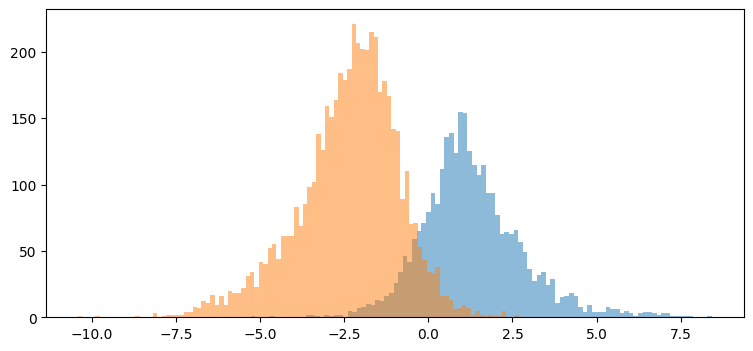

In [10]:
p = 0.5
fig, ax = plt.subplots(1,1,figsize=(9,4))
logits = results["calibration_validation"]["logits"]
labels = results["calibration_validation"]["labels"]
llrs_cls1 = logits[labels == 1] - np.log(p / (1 - p))
llrs_cls0 = logits[labels == 0] + np.log(p / (1 - p))
ax.hist(llrs_cls1,bins=100,alpha=0.5);
ax.hist(llrs_cls0,bins=100,alpha=0.5);

IndentationError: expected an indented block after function definition on line 11 (3403560559.py, line 13)